<a href="https://colab.research.google.com/github/Krrish3398/AIforMankind_volunteer_work/blob/main/false_positive_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!wget --header="Host: doc-0o-9g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36 Edg/86.0.622.38" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_h4rk3aeaa12f6p54vgkh9nd6bd4in2hv_nonce=hmaubt25ipvq4" --header="Connection: keep-alive" "https://doc-0o-9g-docs.googleusercontent.com/docs/securesc/ep57kopdhhsm8o74qsr12tpda128i9ip/ffrv7g728jrk0q86bfn25cqpsa8ddu47/1604490150000/02654991896143504318/02654991896143504318/1KrgRFGVQdRtukKBzCbOr-3J898hMA0tQ?e=download&authuser=0&nonce=hmaubt25ipvq4&user=02654991896143504318&hash=kpfoejjhhjj3puf4ksg485b4me5465ee" -c -O 'false_positives.rar'

--2020-11-04 11:43:23--  https://doc-0o-9g-docs.googleusercontent.com/docs/securesc/ep57kopdhhsm8o74qsr12tpda128i9ip/ffrv7g728jrk0q86bfn25cqpsa8ddu47/1604490150000/02654991896143504318/02654991896143504318/1KrgRFGVQdRtukKBzCbOr-3J898hMA0tQ?e=download&authuser=0&nonce=hmaubt25ipvq4&user=02654991896143504318&hash=kpfoejjhhjj3puf4ksg485b4me5465ee
Resolving doc-0o-9g-docs.googleusercontent.com (doc-0o-9g-docs.googleusercontent.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to doc-0o-9g-docs.googleusercontent.com (doc-0o-9g-docs.googleusercontent.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/rar]
Saving to: ‘false_positives.rar’

false_positives.rar     [      <=>           ]  61.52M  41.2MB/s    in 1.5s    

2020-11-04 11:43:26 (41.2 MB/s) - ‘false_positives.rar’ saved [64504531]



In [ ]:
!pip install unrar
!unrar x '/content/false_positives.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/false_positives.rar

Creating    false_positives                                           OK
Creating    false_positives/bird                                      OK
Extracting  false_positives/bird/crop_lp-n-mobo-c-1601590861.jpg           0%  OK 
Extracting  false_positives/bird/crop_lp-n-mobo-c-1601592181.jpg           0%  OK 
Extracting  false_positives/bird/crop_sp-s-mobo-c-1601592150.jpg           0%  OK 
Creating    false_positives/microwave_dish                            OK
Extracting  false_positives/microwave_dish/crop_pi-n-mobo-c-1601596563.jpg       0%  OK 
Extracting  false_positives/microwave_dish/crop_pi-n-mobo-c-1601596623.jpg       0%  OK 
Extracting  false_positives/microwave_dish/crop_pi-n-mobo-c-1601596683.jpg       0%  OK 
Extracting  false_positives/microwave_dish/crop_pi-n-mobo-c-1601596743.jpg       0%  OK

folder structure

```
false_positives/
  bird/
  hills/
  microwave_dish/
  rod/
  wire/
```

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/My Drive/false_positives')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

451


Here are some wire:

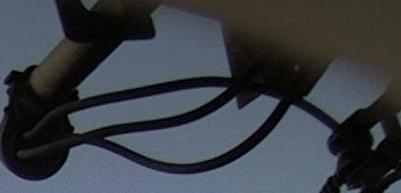

In [ ]:
wire = list(data_dir.glob('wire/*'))
PIL.Image.open(str(wire[-1]))

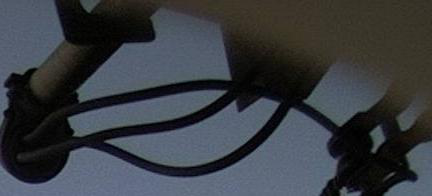

In [ ]:
PIL.Image.open(str(wire[1]))

And some rods:

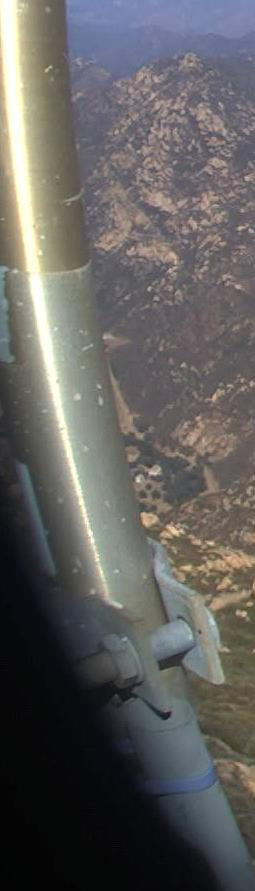

In [ ]:
rod = list(data_dir.glob('rod/*'))
PIL.Image.open(str(rod[0]))

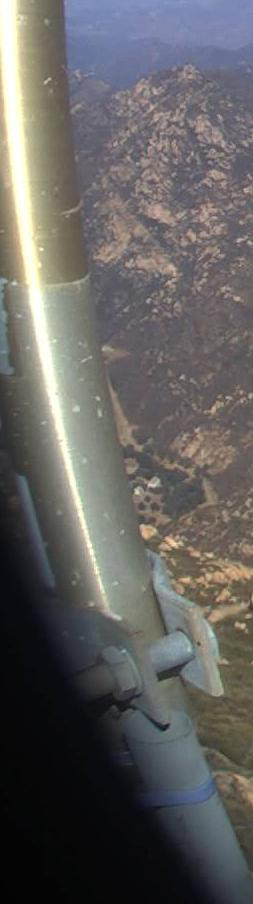

In [ ]:
PIL.Image.open(str(rod[1]))

In [ ]:
batch_size = 16
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 461 files belonging to 5 classes.
Using 369 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 461 files belonging to 5 classes.
Using 92 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bird', 'microwave_dish', 'mountain', 'rod', 'wire']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 180, 180, 3)
(16,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.010344079 1.0


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

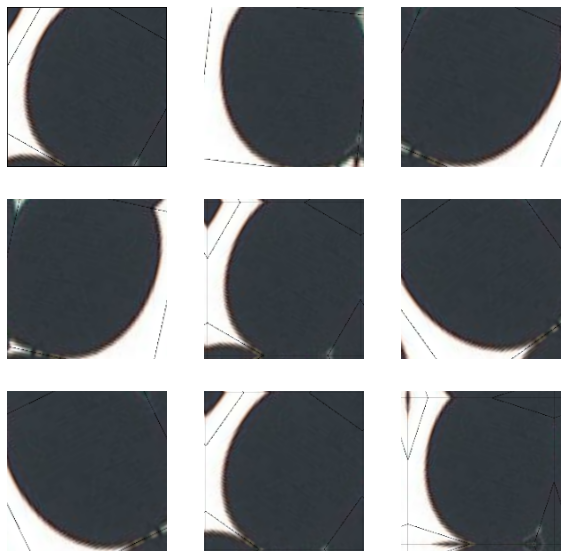

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
24/24 [==============================] - 14s 576ms/step - loss: 1.2606 - accuracy: 0.5149 - val_loss: 1.0330 - val_accuracy: 0.6522
Epoch 2/50
24/24 [==============================] - 13s 552ms/step - loss: 0.6354 - accuracy: 0.7534 - val_loss: 1.4061 - val_accuracy: 0.7717
Epoch 3/50
24/24 [==============================] - 13s 550ms/step - loss: 0.5675 - accuracy: 0.8130 - val_loss: 0.3536 - val_accuracy: 0.8370
Epoch 4/50
24/24 [==============================] - 13s 550ms/step - loss: 0.2864 - accuracy: 0.8835 - val_loss: 0.3236 - val_accuracy: 0.8804
Epoch 5/50
24/24 [==============================] - 13s 553ms/step - loss: 0.2270 - accuracy: 0.9079 - val_loss: 0.1716 - val_accuracy: 0.9348
Epoch 6/50
24/24 [==============================] - 13s 552ms/step - loss: 0.2142 - accuracy: 0.9024 - val_loss: 0.3302 - val_accuracy: 0.8152
Epoch 7/50
24/24 [==============================] - 13s 556ms/step - loss: 0.1604 - accuracy: 0.9377 - val_loss: 0.1411 - val_accuracy: 0.9457

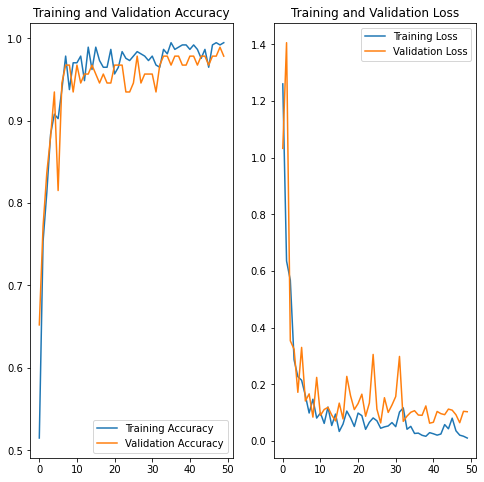

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
img_path = pathlib.Path('/content/drive/My Drive/false_positives/microwave_dish/crop_pi-n-mobo-c-1601596683.jpg')

In [ ]:
img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to microwave_dish with a 100.00 percent confidence.


In [ ]:
model.save('/content/drive/My Drive/saved_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_model/assets


In [ ]:
saved = tf.keras.models.load_model('/content/drive/My Drive/saved model')